In [1]:
# Import all the stuff we will need
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

from numpy.random import seed
seed(1)

In [2]:
# generate some data, add to df
n = 10000

# keep it simple for now, use gaussians
var_1 = np.random.normal(2, 4, n)
var_2 = np.random.normal(1, 3, n)
var_3 = np.random.normal(3, 6, n)
var_4 = np.random.normal(10, 3, n)

data = pd.DataFrame({"x1" : var_1,
                     "x2" : var_2,
                     "x3" : var_3,
                     "x4" : var_4
                    })
data

,x1,x2,x3,x4
0,8.497381,0.632578,-8.589383,11.158165
1,-0.447026,1.684509,2.037443,8.502543
2,-0.112687,-0.056915,-1.993317,13.859463
3,-2.291874,-1.491660,1.763331,8.943360
4,5.461631,0.216731,9.157530,16.728704
...,...,...,...,...
9995,2.291834,-1.829625,7.138946,10.977742
9996,3.956409,3.346647,6.316917,14.382833
9997,-2.056575,8.225301,2.496971,13.693390
9998,1.749215,3.648357,-4.701207,11.989952


In [3]:
# Add variable 5 as a linear transformation of vars 1-4
a1 = 1
a2 = 5
a3 = -2
a4 = 6

data["target"] = a1 * data.x1 + a2 * data.x2 + a3 * data.x3 + a4 * data.x4
data

,x1,x2,x3,x4,target
0,8.497381,0.632578,-8.589383,11.158165,95.788029
1,-0.447026,1.684509,2.037443,8.502543,54.915893
2,-0.112687,-0.056915,-1.993317,13.859463,86.746147
3,-2.291874,-1.491660,1.763331,8.943360,40.383321
4,5.461631,0.216731,9.157530,16.728704,88.602447
...,...,...,...,...,...
9995,2.291834,-1.829625,7.138946,10.977742,44.732269
9996,3.956409,3.346647,6.316917,14.382833,94.352809
9997,-2.056575,8.225301,2.496971,13.693390,116.236332
9998,1.749215,3.648357,-4.701207,11.989952,101.333124


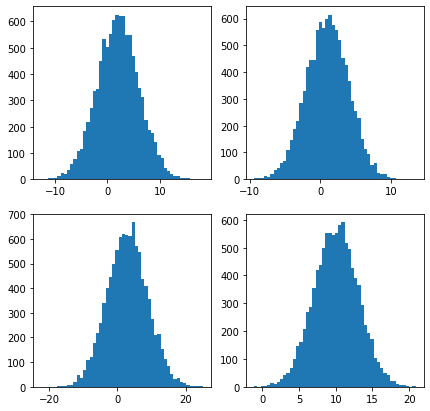

In [4]:
# draw vars
fig, axs = plt.subplots(2, 2, figsize = (7, 7))
bins = 50
_ = axs[0, 0].hist(data.x1, bins = bins)
_ = axs[0, 1].hist(data.x2, bins = bins)
_ = axs[1, 0].hist(data.x3, bins = bins)
_ = axs[1, 1].hist(data.x4, bins = bins)

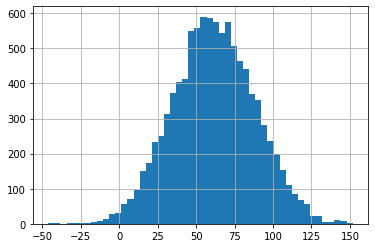

In [5]:
# draw target
bins = 50
_ = data.target.hist(bins = bins)

In [6]:
# split into training and testing data, 70% fraction
# will split test into validation during model training
split = int(0.7 * len(data))
train = data[0:split]
test  = data[split:]

X_train, y_train = train[["x1", "x2", "x3", "x4"]], train["target"]
X_test, y_test = test[["x1", "x2", "x3", "x4"]], test["target"]

X_train = X_train.values
y_train = y_train.values
X_test  = X_test.values
y_test  = y_test.values

In [49]:
# setup autoencoder, we will use a NN with 4 - 3 - 2 - 3 -4 to encode and decode our data
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(4,)))
model.add(Dense(3, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(4, activation='linear'))

model.summary()

learning_rate = 0.001 * 2
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate)
model.compile(loss="mse", optimizer=optimizer, metrics=["mse"])

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_64 (Dense)             (None, 3)                 15        
_________________________________________________________________
dense_65 (Dense)             (None, 2)                 8         
_________________________________________________________________
dense_66 (Dense)             (None, 3)                 9         
_________________________________________________________________
dense_67 (Dense)             (None, 4)                 16        
Total params: 68
Trainable params: 68
Non-trainable params: 0
_________________________________________________________________


In [50]:
epochs = 300

from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model.fit(x=X_train, y=y_train, batch_size=10, epochs=epochs, validation_split=0.3, callbacks=[es])

Epoch 1/300
490/490 [==============================] - 1s 1ms/step - loss: 1301.4005 - mse: 1301.4005 - val_loss: 20.3103 - val_mse: 20.3103
Epoch 2/300
490/490 [==============================] - 1s 1ms/step - loss: 11.5274 - mse: 11.5274 - val_loss: 5.5533 - val_mse: 5.5533
Epoch 3/300
490/490 [==============================] - 0s 971us/step - loss: 4.2507 - mse: 4.2507 - val_loss: 2.2263 - val_mse: 2.2263
Epoch 4/300
490/490 [==============================] - 0s 980us/step - loss: 2.5776 - mse: 2.5776 - val_loss: 1.5646 - val_mse: 1.5646
Epoch 5/300
490/490 [==============================] - 1s 1ms/step - loss: 2.0298 - mse: 2.0298 - val_loss: 1.2048 - val_mse: 1.2048
Epoch 6/300
490/490 [==============================] - 0s 997us/step - loss: 1.7326 - mse: 1.7326 - val_loss: 1.0189 - val_mse: 1.0189
Epoch 7/300
490/490 [==============================] - 1s 1ms/step - loss: 1.5919 - mse: 1.5919 - val_loss: 0.9307 - val_mse: 0.9307
Epoch 8/300
490/490 [==============================] 

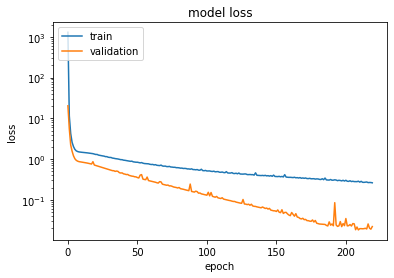

In [51]:
# learning curve
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.gca().set_yscale("log")
plt.show()

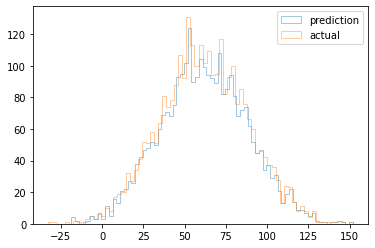

In [53]:
nbins = 75
y_pred = model.predict(X_test)[:,0]
plt.hist(y_pred,  bins = nbins, label = "prediction", alpha = 0.4, histtype = "step")
plt.hist(y_test, bins = nbins, label = "actual", alpha = 0.4, histtype = "step")
_ = plt.legend()